### Import the required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


from warnings import filterwarnings
filterwarnings("ignore")

### Load the required Dataset

In [2]:
grocery = pd.read_csv('dataset_group.csv')

In [3]:
grocery.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


### Dataset

In [4]:
grocery.shape
print("The number of rows are:", grocery.shape[0],"and the number of columns are:", grocery.shape[1])

The number of rows are: 20641 and the number of columns are: 3


In [5]:
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


### Check for Missing Values

In [6]:
grocery.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

### Descriptive Statistics

In [7]:
grocery.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


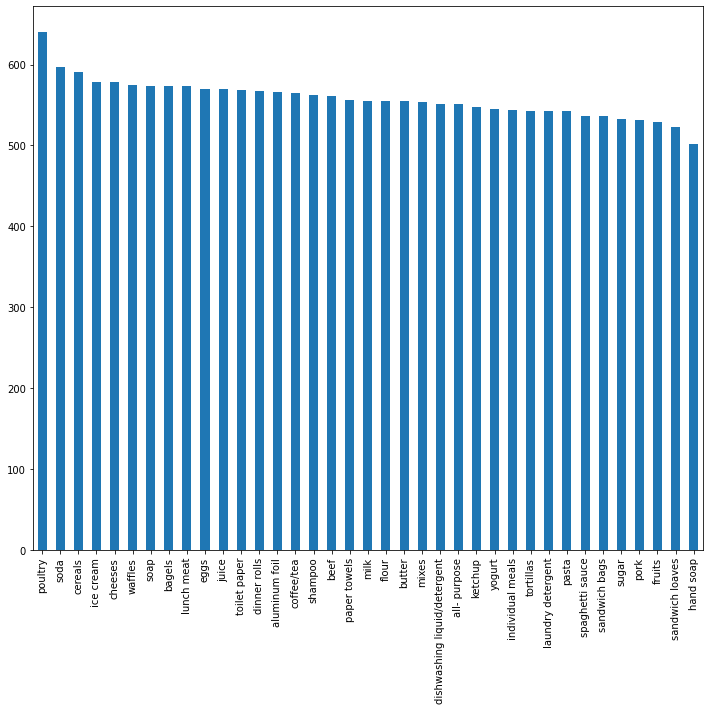

In [8]:
grocery['Product'].value_counts().sort_values(ascending=False).head(37).plot(kind='bar',figsize=(12,10));

### Market Basket Analysis

In [9]:
basket = grocery.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')

In [10]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [11]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [12]:
basket = basket.applymap(encode_zero_one)

In [13]:
itemsets = apriori(basket, min_support = 0.05, use_colnames = True, low_memory=True)
itemsets

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
8449,0.051800,"(spaghetti sauce, dinner rolls, ice cream, pou..."
8450,0.051800,"(spaghetti sauce, dinner rolls, juice, poultry)"
8451,0.053556,"(spaghetti sauce, laundry detergent, dinner ro..."
8452,0.050044,"(dishwashing liquid/detergent, laundry deterge..."


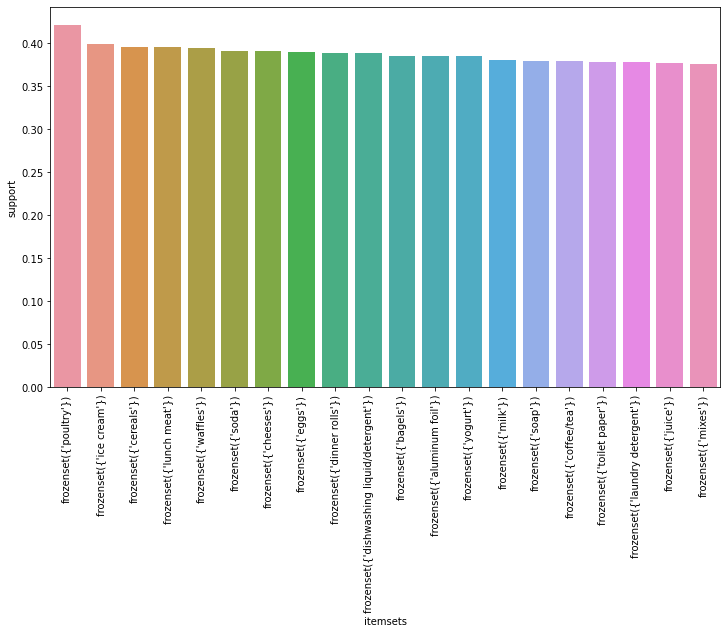

In [14]:
plt.figure(figsize=(12,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:20,1],
            itemsets.sort_values('support',ascending=False).iloc[0:20,0])
plt.xticks(rotation=90)
plt.show()

Check the rules using association_rules

In [15]:
basket = association_rules(itemsets, metric ="lift") 

In [16]:
basket = basket.sort_values(['lift','confidence'], ascending =[False, False]) 

In [17]:
basket.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
47953,"(pasta, paper towels)","(eggs, ice cream)",0.164179,0.166813,0.055312,0.336898,2.019617,0.027924,1.256500
47948,"(eggs, ice cream)","(pasta, paper towels)",0.166813,0.164179,0.055312,0.331579,2.019617,0.027924,1.250441
47951,"(ice cream, pasta)","(eggs, paper towels)",0.167691,0.165935,0.055312,0.329843,1.987784,0.027486,1.244581
47950,"(eggs, paper towels)","(ice cream, pasta)",0.165935,0.167691,0.055312,0.333333,1.987784,0.027486,1.248464
47854,"(dinner rolls, paper towels)","(eggs, pasta)",0.155399,0.169447,0.051800,0.333333,1.967185,0.025468,1.245830
47851,"(eggs, pasta)","(dinner rolls, paper towels)",0.169447,0.155399,0.051800,0.305699,1.967185,0.025468,1.216477
47908,"(spaghetti sauce, poultry)","(dinner rolls, juice)",0.171203,0.157155,0.051800,0.302564,1.925254,0.024894,1.208490
47909,"(dinner rolls, juice)","(spaghetti sauce, poultry)",0.157155,0.171203,0.051800,0.329609,1.925254,0.024894,1.236289
47796,"(sandwich bags, cereals)","(bagels, cheeses)",0.158033,0.167691,0.050922,0.322222,1.921524,0.024421,1.227997
47797,"(bagels, cheeses)","(sandwich bags, cereals)",0.167691,0.158033,0.050922,0.303665,1.921524,0.024421,1.209140
